In [2]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [3]:
#import csv file into dataframe df
df = pd.read_csv('artworksdata.csv')

In [4]:
#make first value in 'orientation' lower case
df.loc[0, 'collection'] = 'whistleblower'
df.shape

(28, 17)

In [5]:
#make all column titles lower case for uniformity
df.columns = map(str.lower, df.columns)
df.columns
df.shape

(28, 17)

In [6]:
#count the number of unique values in certain columns that look repetitive
#returns 3 unique values in 'size' and 2 unique values in 'orientation'
df['size'].nunique()
df['orientation'].nunique()

2

In [7]:
#drop 'is part collection' as there is already a 'collection' column
#drop 'size' as all rows contain similar values and 'orientation' gives better context to this variable
df.drop('is part collection', axis=1, inplace=True)
df.drop('size', axis=1, inplace=True)

In [8]:
#convert to appropriate dtypes.
#I'm choosing Int64 rather than int because we need to use a nullable integer type to avoid having to replace null values with 0 before converting integers to floats.
df['year sold'] = df['year sold'].astype('Int64')
df['price listed'] = df['price listed'].astype(float)
df['editions created'] = df['editions created'].astype('Int64')
df['editions sold'] =  df['editions sold'].astype('Int64')

In [ ]:
df.isna().sum()
# all null values appear to be structurally missing from my domain knowledge.
#check for duplicate rows
df.duplicated()

In [ ]:
#subsetting table for analysis
soldworks = df[['artwork title', 'year created', 'year listed', 'medium',
       'color theme', 'dom color', 'year sold', 'sold at', 'price listed',
       'price sold', 'orientation', 'style', 'editions created',
       'editions sold', 'collection']].copy()
soldworks = soldworks[soldworks['year sold'].notnull()]
soldworks = soldworks.reset_index(drop=True)

In [11]:
unsoldworks = df[['artwork title', 'year created', 'year listed', 'medium',
       'color theme', 'dom color', 'year sold', 'price listed',
       'orientation', 'style', 'collection']].copy()
unsoldworks = unsoldworks[unsoldworks['year sold'].isnull()]
unsoldworks = unsoldworks.reset_index(drop=True)
#drop now redundant 'year sold' column
unsoldworks.drop('year sold', axis=1, inplace=True)


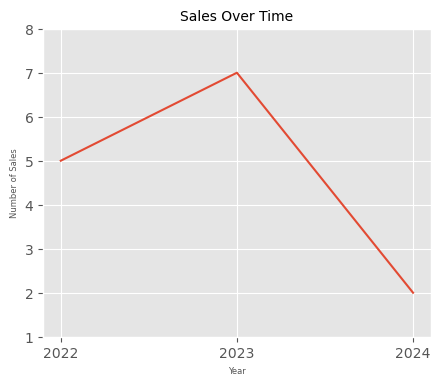

In [67]:
#what are the trends in sales over time?
plt.figure(figsize=(5, 4))
soldworks['year sold'].value_counts().sort_index().plot(kind='line')
plt.title('Sales Over Time', fontsize=10)
plt.xlabel('Year', fontsize=6)
plt.ylabel('Number of Sales', fontsize=6)
years = sorted(soldworks['year sold'].unique()) 
plt.xticks(ticks=years)
plt.yticks(range(1, 9))
plt.show()

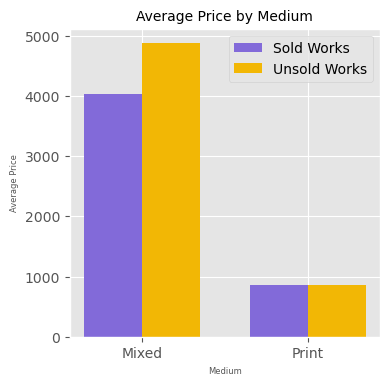

In [58]:
#what is the average price for each medium in soldworks and unsold works?
sold_avg = soldworks.groupby('medium')['price sold'].mean()
unsold_avg = unsoldworks.groupby('medium')['price listed'].mean()

# Combine both datasets into a single DataFrame for easier plotting
avg_prices = pd.DataFrame({
    'Sold Works': sold_avg,
    'Unsold Works': unsold_avg
}).reset_index()


x = np.arange(len(avg_prices['medium'])) 
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(4, 4))
bars1 = ax.bar(x - width/2, avg_prices['Sold Works'], width, label='Sold Works', color='#826AD9')
bars2 = ax.bar(x + width/2, avg_prices['Unsold Works'], width, label='Unsold Works', color='#F2B705')


ax.set_xlabel('Medium', fontsize=6)
ax.set_ylabel('Average Price', fontsize=6)
ax.set_title('Average Price by Medium', fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(avg_prices['medium'])
ax.legend()


plt.show()


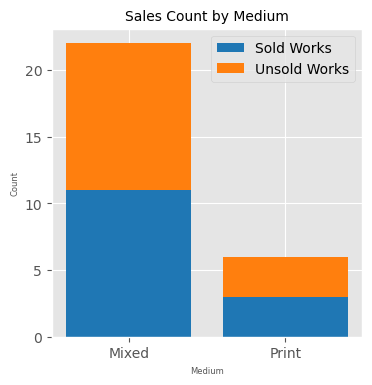

In [57]:
#How many works in each medium were sold and how many weren’t?

sold_count = soldworks['medium'].value_counts()
unsold_count = unsoldworks['medium'].value_counts()

#combine both counts into a single DataFrame for easier plotting
counts = pd.DataFrame({
    'Sold Works': sold_count,
    'Unsold Works': unsold_count
}).fillna(0).astype(int).reset_index()
counts = counts.rename(columns={'index': 'medium'})

fig, ax = plt.subplots(figsize=(4, 4))  # Adjust the figure size as needed

ax.bar(counts['medium'], counts['Sold Works'], label='Sold Works', color='#1f77b4')
ax.bar(counts['medium'], counts['Unsold Works'], bottom=counts['Sold Works'], label='Unsold Works', color='#ff7f0e')

ax.set_xlabel('Medium', fontsize=6)
ax.set_ylabel('Count', fontsize=6)
ax.set_title('Sales Count by Medium', fontsize=10)
ax.legend()
plt.show()


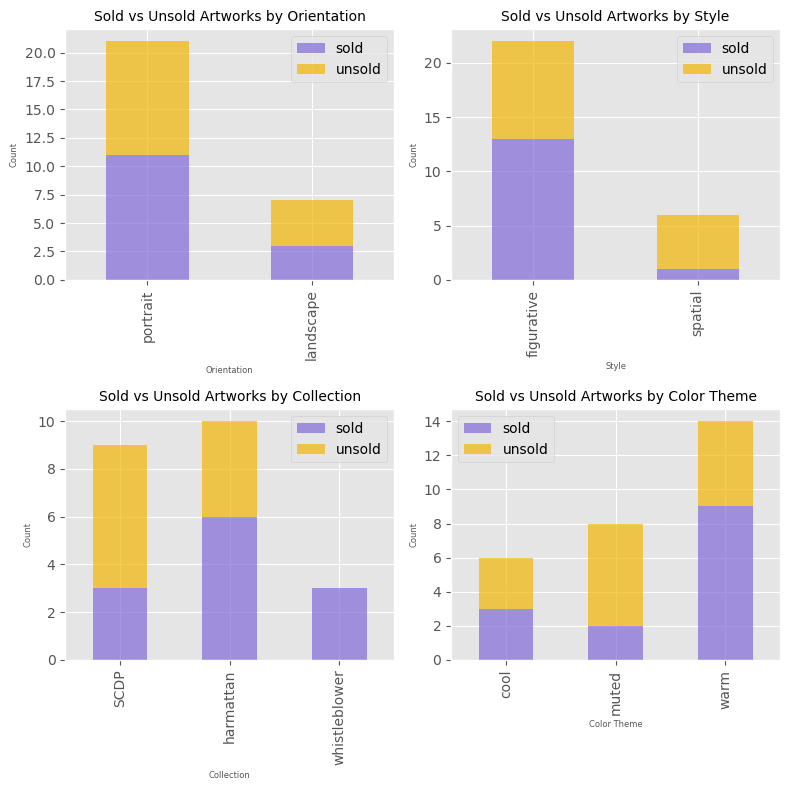

In [56]:
#Are there specific orientations, styles, collections or color themes
#that make up more of the soldworks and unsoldworks

#group sold and unsold by different categories and count
sold_orientations = soldworks['orientation'].value_counts()
unsold_orientations = unsoldworks['orientation'].value_counts()

sold_styles = soldworks['style'].value_counts()
unsold_styles = unsoldworks['style'].value_counts()

sold_collections = soldworks['collection'].value_counts()
unsold_collections = unsoldworks['collection'].value_counts()

sold_colors = soldworks['color theme'].value_counts()
unsold_colors = unsoldworks['color theme'].value_counts()

#combine the sold and unsold counts for each category
orientation_counts = pd.DataFrame({
    'sold': sold_orientations,
    'unsold': unsold_orientations
}).fillna(0)

style_counts = pd.DataFrame({
    'sold': sold_styles,
    'unsold': unsold_styles
}).fillna(0)

collection_counts = pd.DataFrame({
    'sold': sold_collections,
    'unsold': unsold_collections
}).fillna(0)

color_counts = pd.DataFrame({
    'sold': sold_colors,
    'unsold': unsold_colors
}).fillna(0)

#plotting
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

#orientations
orientation_counts.plot(kind='bar', stacked=True, ax=axes[0, 0], color=['#826AD9', '#F2B705'], alpha=0.7)
axes[0, 0].set_title('Sold vs Unsold Artworks by Orientation', fontsize=10)
axes[0, 0].set_ylabel('Count', fontsize=6)
axes[0, 0].set_xlabel('Orientation', fontsize=6)

#styles
style_counts.plot(kind='bar', stacked=True, ax=axes[0, 1], color=['#826AD9', '#F2B705'], alpha=0.7)
axes[0, 1].set_title('Sold vs Unsold Artworks by Style', fontsize=10)
axes[0, 1].set_ylabel('Count', fontsize=6)
axes[0, 1].set_xlabel('Style', fontsize=6)

#collections
collection_counts.plot(kind='bar', stacked=True, ax=axes[1, 0], color=['#826AD9', '#F2B705'], alpha=0.7)
axes[1, 0].set_title('Sold vs Unsold Artworks by Collection', fontsize=10)
axes[1, 0].set_ylabel('Count', fontsize=6)
axes[1, 0].set_xlabel('Collection', fontsize=6)

#color themes
color_counts.plot(kind='bar', stacked=True, ax=axes[1, 1], color=['#826AD9', '#F2B705'], alpha=0.7)
axes[1, 1].set_title('Sold vs Unsold Artworks by Color Theme', fontsize=10)
axes[1, 1].set_ylabel('Count', fontsize=6)
axes[1, 1].set_xlabel('Color Theme', fontsize=6)

plt.tight_layout()
plt.show()


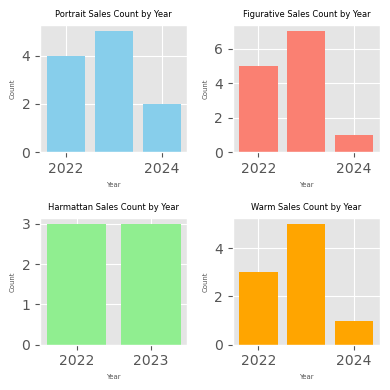

In [47]:
#what factors impact the high or low sales in each year?
#visualize the highest selling categories to see which year they occur

# Filter the data for each high-selling category
high_sales_orientation = soldworks[soldworks['orientation'] == 'portrait'].groupby('year sold').size().reset_index(name='count')
high_sales_style = soldworks[soldworks['style'] == 'figurative'].groupby('year sold').size().reset_index(name='count')
high_sales_collection = soldworks[soldworks['collection'] == 'harmattan'].groupby('year sold').size().reset_index(name='count')
high_sales_color = soldworks[soldworks['color theme'] == 'warm'].groupby('year sold').size().reset_index(name='count')

fig, axes = plt.subplots(2, 2, figsize=(4, 4))

#orientation
axes[0, 0].bar(high_sales_orientation['year sold'], high_sales_orientation['count'], color='skyblue')
axes[0, 0].set_title('Portrait Sales Count by Year', fontsize=6)
axes[0, 0].set_xlabel('Year', fontsize=5)
axes[0, 0].set_ylabel('Count', fontsize=5)
axes[0, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

#style
axes[0, 1].bar(high_sales_style['year sold'], high_sales_style['count'], color='salmon')
axes[0, 1].set_title('Figurative Sales Count by Year', fontsize=6)
axes[0, 1].set_xlabel('Year', fontsize=5)
axes[0, 1].set_ylabel('Count', fontsize=5)
axes[0, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

#collection
axes[1, 0].bar(high_sales_collection['year sold'], high_sales_collection['count'], color='lightgreen')
axes[1, 0].set_title('Harmattan Sales Count by Year', fontsize=6)
axes[1, 0].set_xlabel('Year', fontsize=5)
axes[1, 0].set_ylabel('Count', fontsize=5)
axes[1, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

#color theme
axes[1, 1].bar(high_sales_color['year sold'], high_sales_color['count'], color='orange')
axes[1, 1].set_title('Warm Sales Count by Year', fontsize=6)
axes[1, 1].set_xlabel('Year', fontsize=5)
axes[1, 1].set_ylabel('Count', fontsize=5)
axes[1, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

plt.tight_layout()
plt.show()


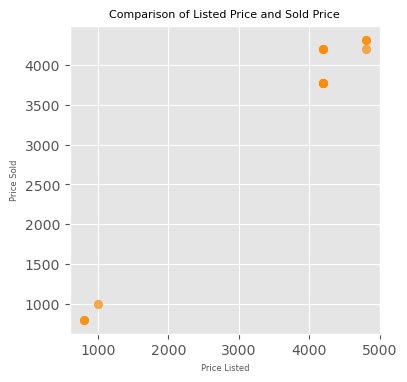

In [59]:
# How do 'listed price' and 'sold price' compare in soldworks?
plt.figure(figsize=(4, 4))
plt.scatter(soldworks['price listed'], soldworks['price sold'], color='darkorange', alpha=0.7, label='Price Comparison')
plt.title('Comparison of Listed Price and Sold Price', fontsize=8)
plt.xlabel('Price Listed', fontsize=6)
plt.ylabel('Price Sold', fontsize=6)
plt.grid(True)


plt.show()



C:\Users\Azu\AppData\Local\Temp\ipykernel_13992\2512772093.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Sales', y='Location', data=sales_by_location, palette='viridis')


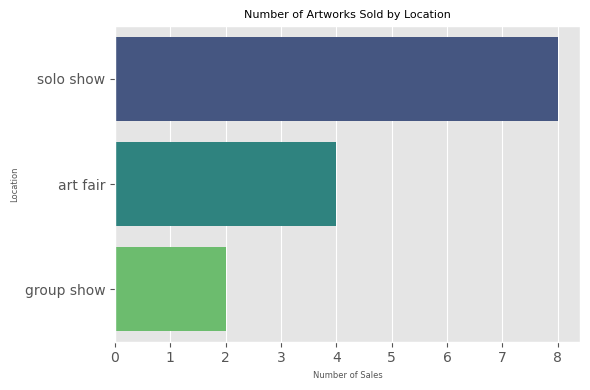

In [62]:
#at what events do artworks sell most?
sales_by_location = soldworks['sold at'].value_counts().reset_index()
sales_by_location.columns = ['Location', 'Number of Sales']

plt.figure(figsize=(6, 4))
sns.barplot(x='Number of Sales', y='Location', data=sales_by_location, palette='viridis')
plt.title('Number of Artworks Sold by Location', fontsize=8)
plt.xlabel('Number of Sales', fontsize=6)
plt.ylabel('Location', fontsize=6)
plt.tight_layout()

plt.show()


In [ ]:
#additional subsets
sales_trends = soldworks.groupby('year sold').size().reset_index(name='count sold')
medium_sales = soldworks.groupby('medium').size().reset_index(name='count sold')
orientation_sales = soldworks.groupby('orientation').size().reset_index(name='count sold')
style_sales = soldworks.groupby('style').size().reset_index(name='count sold')
location_sales = soldworks.groupby('sold at').size().reset_index(name='count sold')

In [ ]:
price_comparison = soldworks[['artwork title', 'price listed', 'price sold']]
price_comparison['price difference'] = price_comparison['price listed'] - price_comparison['price sold']


In [22]:
#exporting to Excel workbook
file_path = 'artworks_aggregated_tables.xlsx'
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    soldworks.to_excel(writer, sheet_name='Sold Works', index=False)
    unsoldworks.to_excel(writer, sheet_name='Unsold Works', index=False)
    sales_trends.to_excel(writer, sheet_name='Sales Trends', index=False)
    price_comparison.to_excel(writer, sheet_name='Listed vs Sold Price', index=False)
    medium_sales.to_excel(writer, sheet_name='Sales by Medium', index=False)
    orientation_sales.to_excel(writer, sheet_name='Sales by Orientation', index=False)
    style_sales.to_excel(writer, sheet_name='Sales by Style', index=False)
    location_sales.to_excel(writer, sheet_name='Sales by Location', index=False)
    df.to_excel(writer, sheet_name='All Artworks', index=False)
    